#### Building an Image Denoiser with a Keras autoencoder neural network

In [1]:
#imports
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.constraints import max_norm
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 150
no_epochs = 50
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.55
number_of_visualizations = 6

In [4]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [9]:
# Reshape data based on channels first / channels last strategy.
# This is dependent on whether you use TF, Theano or CNTK as backend.

if K.image_data_format() == 'channels_first':
    print("Channels first")
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    print("Not channels first")
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0],img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

print("Input train shape", input_train.shape)
print("Input test shape", input_test.shape)
print("Model input shape", input_shape)


Not channels first
Input train shape (60000, 28, 28, 1)
Input test shape (10000, 28, 28, 1)
Model input shape (28, 28, 1)


In [11]:
#Parse numbers as float
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [12]:
#Add noise to the dataset
pure_train = input_train
pure_test = input_test

noise_train = np.random.normal(0, 1, pure_train.shape)
noise_test = np.random.normal(0, 1, pure_test.shape)

noisy_input_train = pure_train + noise_factor * noise_train
noisy_input_test = pure_test + noise_factor * noise_test

In [13]:
#Create the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform')) #max_norm_value is 2.0
model.add(Conv2DTranspose(32, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu',kernel_initializer='he_uniform'))
model.add(Conv2DTranspose(64, kernel_size=(3,3),kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(1, kernel_size=(3, 3),kernel_constraint=max_norm(max_norm_value),activation='sigmoid', padding='same'))

model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-20 19:19:27.839348: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-20 19:19:27.841788: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 conv2d_transpose (Conv2DTra  (None, 26, 26, 32)       9248      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 64)       18496     
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         577       
                                                                 
Total params: 47,425
Trainable params: 47,425
Non-traina

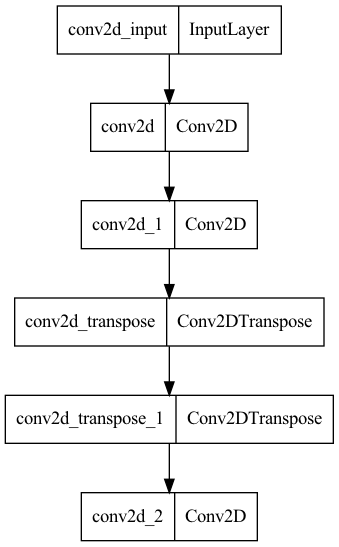

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [15]:
# Compile and fit data
#Here X is Noisy image and y is normal image
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_input_train, pure_train, epochs=no_epochs, batch_size=batch_size, validation_split=validation_split)

2022-10-20 19:21:10.779994: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-10-20 19:21:17.100509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


320/320 [==============================] - ETA: 0s - loss: 0.1250

2022-10-20 19:21:42.264852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


320/320 [==============================] - 33s 69ms/step - loss: 0.1250 - val_loss: 0.1082
Epoch 2/50
320/320 [==============================] - 19s 58ms/step - loss: 0.1053 - val_loss: 0.1041
Epoch 3/50
320/320 [==============================] - 31s 98ms/step - loss: 0.1025 - val_loss: 0.1020
Epoch 4/50
320/320 [==============================] - 37s 110ms/step - loss: 0.1011 - val_loss: 0.1012
Epoch 5/50
320/320 [==============================] - 21s 62ms/step - loss: 0.1002 - val_loss: 0.1007
Epoch 6/50
320/320 [==============================] - 17s 54ms/step - loss: 0.0996 - val_loss: 0.0998
Epoch 7/50
320/320 [==============================] - 35s 107ms/step - loss: 0.0991 - val_loss: 0.0995
Epoch 8/50
320/320 [==============================] - 30s 90ms/step - loss: 0.0987 - val_loss: 0.0988
Epoch 9/50
320/320 [==============================] - 20s 62ms/step - loss: 0.0984 - val_loss: 0.0988
Epoch 10/50
320/320 [==============================] - 15s 48ms/step - loss: 0.0981 - val_l

In [16]:
#Generate denoised images
samples = noisy_input_test[:number_of_visualizations]
targets = target_test[:number_of_visualizations]
denoised_images = model.predict(samples)

2022-10-20 19:41:24.298039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


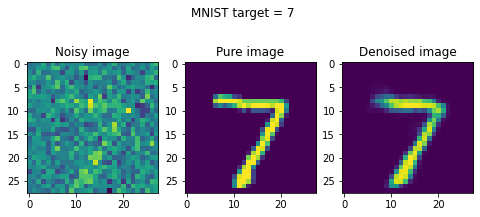

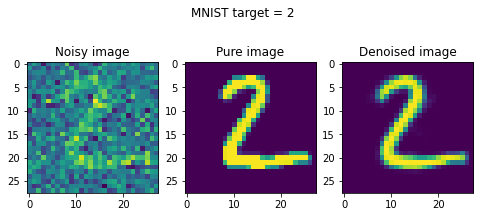

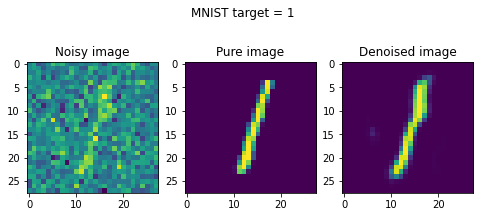

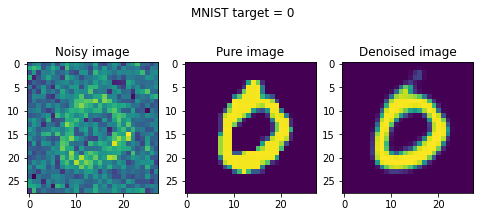

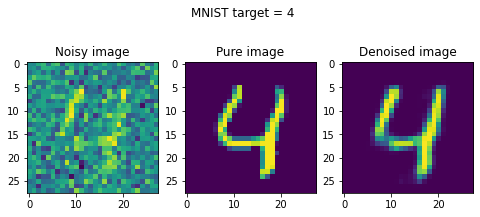

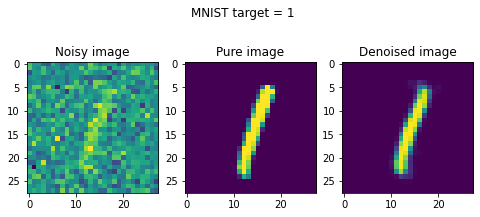

In [17]:
# Plot denoised images
for i in range(0, number_of_visualizations):
    # Get the sample and the reconstruction
    noisy_image = noisy_input_test[i][:, :, 0]
    pure_image = pure_test[i][:, :, 0]
    denoised_image = denoised_images[i][:, :, 0]
    input_class = targets[i]
    # Matplotlib preparations
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 3.5)
    # Plot sample and reconstruciton
    axes[0].imshow(noisy_image)
    axes[0].set_title('Noisy image')
    axes[1].imshow(pure_image)
    axes[1].set_title('Pure image')
    axes[2].imshow(denoised_image)
    axes[2].set_title('Denoised image')
    fig.suptitle(f'MNIST target = {input_class}')
    plt.show()